# Arterial Blood Pressure Waveform Analysis

### Author: Stephen Peterkins

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

In [3]:
output_notebook()

Loading BokehJS ...

In [5]:
store=pd.HDFStore('abp_data/ABP_100s.hd5')
waves=store.select('Waveforms')
waves.head(5)

,AR2,I,II,III,V,SPO2
2017-03-07 12:04:58.000000080,65.6,-0.017,-0.029,-0.015,0.054,52.182
2017-03-07 12:04:58.004166747,66.2,-0.012,-0.027,-0.007,0.054,52.299
2017-03-07 12:04:58.008333414,67.6,-0.015,-0.027,-0.017,0.054,52.299
2017-03-07 12:04:58.012500081,69.0,-0.007,-0.027,-0.022,0.066,52.416
2017-03-07 12:04:58.016666748,71.4,-0.005,-0.032,-0.027,0.068,52.416


In [8]:
waveform_data = waves.head(2000)
ecg_signal = waveform_data['I']
abp_signal = waveform_data['AR2']

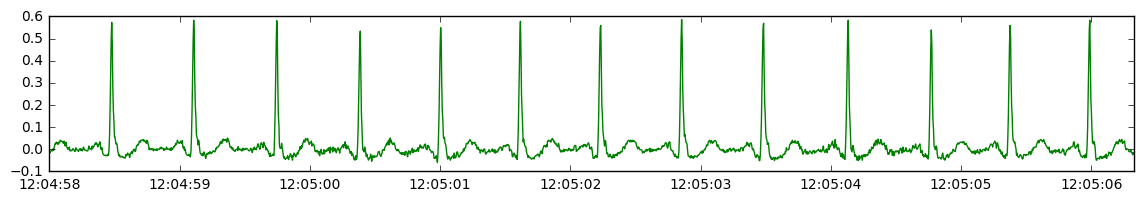

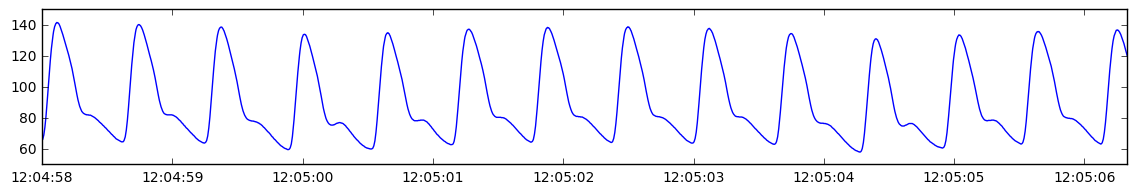

In [9]:
plt.figure(num=1, figsize=(14, 2))
plt.plot(ecg_signal, color='green')
plt.figure(num=2, figsize=(14, 2))
plt.plot(abp_signal, color='blue')
plt.show()

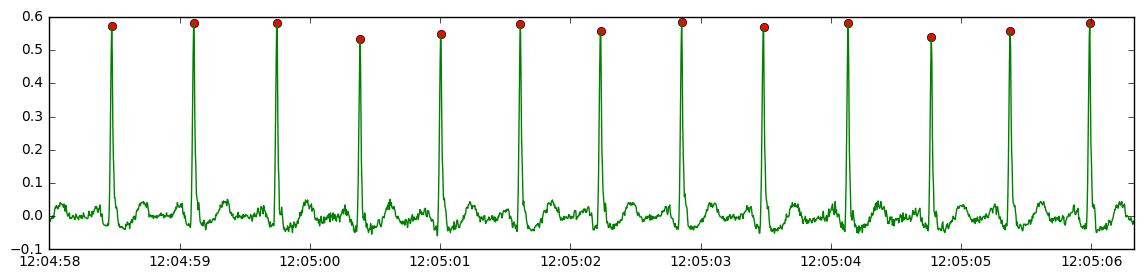

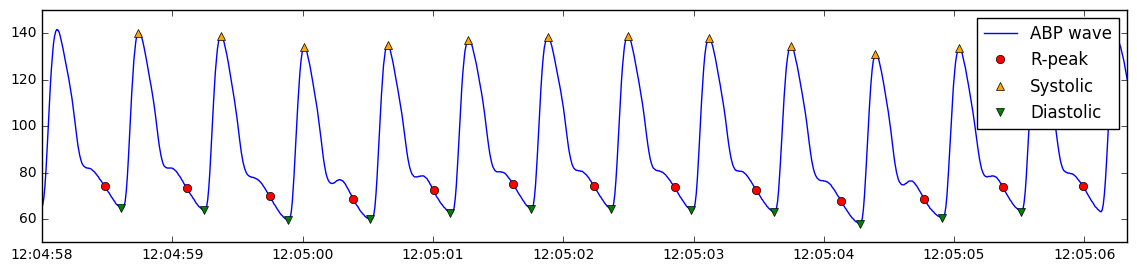

In [11]:
seg_waves = ecg.christov_segmenter(signal=ecg_signal.values, sampling_rate=240.)
R_peaks = np.array(seg_waves).tolist()[0]
systolic = [] #max
diastolic = [] #min

ABP_waves = []
ABP_waves_len = []

for i in range(0,len(R_peaks)-1):
    abp_seg = abp_signal[list(range(R_peaks[i],R_peaks[i+1]))]
    
    abp_max = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.max()].index[0])
    abp_min = abp_seg.index.get_loc(abp_seg[abp_seg == abp_seg.min()].index[0])
    
    ABP_waves.append(abp_seg)
    
    if systolic == []:
        systolic.append(abp_max + R_peaks[0])
        diastolic.append(abp_min + R_peaks[0])
    else:
        wave_int = sum(ABP_waves_len) + R_peaks[0]
        systolic.append(wave_int + abp_max)
        diastolic.append(wave_int + abp_min)

    ABP_waves_len.append(len(abp_seg))
    
plt.figure(num=3, figsize=(14, 3))
plt.plot(ecg_signal[R_peaks], 'o', color='red')
plt.plot(ecg_signal, color='green')
plt.figure(num=4, figsize=(14, 3))
plt.plot(abp_signal, color='blue', label='ABP wave')
plt.plot(abp_signal[R_peaks], 'o', color='red', label='R-peak')
plt.plot(abp_signal[systolic], '^', color='orange', label='Systolic')
plt.plot(abp_signal[diastolic], 'v', color='green', label='Diastolic')
plt.legend(numpoints=1)
plt.show()

In [14]:
abp = abp_signal.values.tolist()
abp_keys = abp_signal.keys().tolist()

p = figure(plot_width=900, title="ABP", x_axis_label='x', y_axis_label='y')
p.line(abp_keys, abp, legend="ABP wave", line_width=2)
show(p, notebook_handle=True)

In [13]:
store.close()

In [15]:
# Break down new sets of abp waveforms
# Many sets of waveforms in a matrix --> consistent numbers per row